In [1]:
from striped.job import SinglePointStripedSession as Session, IPythonDisplay

from histbook import Hist, beside, groupby, below
from histbook import bin as hbin

job_server = ("ifdb01.fnal.gov", 8765)


In [2]:
bg_datasets = """
Summer16.QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT2000toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT200to300_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT300to500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT700to1000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8
Summer16.ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-pythia8_TuneCUETP8M1
Summer16.ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1
Summer16.ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1
Summer16.ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1
Summer16.ST_tW_antitop_5f_NoFullyHadronicDecays_13TeV-powheg_TuneCUETP8M1
Summer16.ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1
Summer16.ST_tW_top_5f_NoFullyHadronicDecays_13TeV-powheg_TuneCUETP8M1
Summer16.WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-1200To2500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-600To800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_HT-800To1200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.ZJetsToNuNu_HT-100To200_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-1200To2500_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-200To400_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-400To600_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-600To800_13TeV-madgraph
Summer16.ZJetsToNuNu_HT-800To1200_13TeV-madgraph
Summer16.ZJetsToNuNu_Zpt-100to200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.ZJetsToNuNu_Zpt-200toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
""".split()
bg_datasets = [ds.strip() for ds in bg_datasets if ds.strip()]


signal_sample = "Summer16.SMS-T1tttt_mGluino-1500_mLSP-100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8"

def category(ds):
    """
    QCD, single top, ttbar, W+jets, Z+jets
    """ 
    if ".QCD" in ds:  return "QCD"
    if ".ST" in ds: return "single top"
    if ".WJets" in ds: return "W+jets"
    if ".ZJets" in ds: return "Z+jets"
    if ".TT" in ds: return "ttbar"
    return "signal"

datasets = [(ds, category(ds)) for ds in bg_datasets + [signal_sample]]

for ds, cat in datasets: print ds, cat



session = Session(job_server)


Summer16.QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT2000toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT200to300_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT300to500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.QCD_HT700to1000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8 QCD
Summer16.ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8 single top
Summer16.ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-pythia8_TuneCUETP8M1 single top
Summer16.ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1 single top
Summer16.ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1 single top
Summer16.ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1 single top
Summer16.ST_tW_antitop_5f_NoFullyHadronicDecays_13TeV-powheg_TuneCUETP8M1 

In [3]:
#__worker_class__

import numpy as np

def p4_pt(p4):
    # p4 is [n,4] numpy array
    # returns [n] numpy array
    return np.sqrt(p4[:,0]**2 + p4[:,1]**2)

def p4_eta(p4):
    p42 = p4**2
    p3 = np.sqrt(np.sum(p42[:,:3], axis=-1))
    return p4[:,2]/p3

class Worker(object):
    
    Columns = ["Weight", "NMuons", "HT", "MHT", "NElectrons", "NJets", "BTags",
            "isoElectronTracks", "isoMuonTracks", "isoPionTracks",
            "DeltaPhi1", "DeltaPhi2", "DeltaPhi3", "DeltaPhi4",
            "JetID", "PFCaloMETRatio","Trigger.pass",
            "NVtx", "eeBadScFilter", "HBHENoiseFilter",
            "HBHEIsoNoiseFilter", "globalTightHalo2016Filter",
            "EcalDeadCellTriggerPrimitiveFilter", "BadChargedCandidateFilter",
            "BadPFMuonFilter",
            "Jet.p4"]
    
    def run(self, events, job):
        
        category = job["category"]
        
        basic_cuts = events.filter((events.NJets >= 2) * (events.HT > 300) * (events.MHT>300)
            * (events.NMuons == 0) * (events.NElectrons == 0) * (events.isoElectronTracks==0)
            * (events.isoMuonTracks==0) * (events.isoPionTracks==0) 
            * (events.DeltaPhi1 > 0.5) * (events.DeltaPhi2 > 0.5) 
            * (events.DeltaPhi3 > 0.3) * (events.DeltaPhi4 > 0.3)
            * (events.JetID==1) * (events.PFCaloMETRatio < 5) * (events.NVtx > 0)
            * (events.eeBadScFilter==1)
            * (events.HBHENoiseFilter==1)
            * (events.HBHEIsoNoiseFilter==1)
            * (events.globalTightHalo2016Filter==1)
            * (events.EcalDeadCellTriggerPrimitiveFilter==1)
            * (events.BadChargedCandidateFilter==1)
            * (events.BadPFMuonFilter==1))
        
        job.fill(category=category, basic_cut_acceptance=[basic_cuts.ratio])
        
        events = basic_cuts(events)
        
        # HT5/HT filter
        jets = events.Jet
        jets_pt = p4_pt(jets.p4)
        jets_eta = p4_eta(jets.p4)
        jet_filter_out = (jets_pt <= 30) + (jets_eta >= 5)
        pt_good = jets_pt.copy()
        pt_good[jet_filter_out] = 0.0
        jets.pt_good = pt_good
        ht5 = np.empty_like(events.HT)
        
        trigger_filter = events.filter()
        for ie, e in enumerate(events):
            
            #if basic_cuts.Mask[ie]:
            
                # ht5 calculation
                ejets = e.Jet
                ht5[ie] = sum([j.pt_good for j in ejets])

                # good trigger
                # can not write "e.Trigger[i].pass" because "pass" is reserved word in Python 
                trigger_filter.Mask[ie] = np.any([e.Trigger[i].dot("pass") for i in [53, 54, 55, 57, 58, 59]])
            
        ht5ht_filter = events.filter((ht5/np.maximum(events.HT, 1.0) <= 2.0))
        
        final_filter = trigger_filter * ht5ht_filter
        
        final_events = final_filter(events)
        
        job.fill(
            category=category,
            NJets = final_events.NJets,
            BTags = final_events.BTags,
            HT = final_events.HT,
            MHT = final_events.MHT,
            weight = final_events.Weight
        )
        
        

In [7]:
basic_cut_narrow = Hist(hbin("basic_cut_acceptance", 50, 0, 0.1), groupby("category", keeporder=True))
basic_cut_wide = Hist(hbin("basic_cut_acceptance", 50, 0, 1.0), groupby("category", keeporder=True))

NJets = Hist(hbin("NJets", 20, 0, 20), groupby("category", keeporder=True), weight="weight")
BTags = Hist(hbin("BTags", 10, 0, 10), groupby("category", keeporder=True), weight="weight")
HT = Hist(hbin("HT", 50, 300, 1800), groupby("category", keeporder=True), weight="weight")
MHT = Hist(hbin("MHT", 50, 300, 1300), groupby("category", keeporder=True), weight="weight")

display = IPythonDisplay(
    below(
        beside(
            basic_cut_narrow.overlay("category").step("basic_cut_acceptance", yscale={"type":"log"}),
            basic_cut_wide.overlay("category").step("basic_cut_acceptance", yscale={"type":"log"})
        ),
        beside(
            NJets.overlay("category").step("NJets"),
            BTags.overlay("category").step("BTags")
        ),
        beside(
            HT.overlay("category").step("HT"),
            MHT.overlay("category").step("MHT")
        )
    )
)

class Callback:
    
    def __init__(self, display):
        self.Display = display
        
    def on_histogram_update(self, nevents):
        self.Display.update()


Summer16.QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8         3.037 M events,   3.658 M events/sec


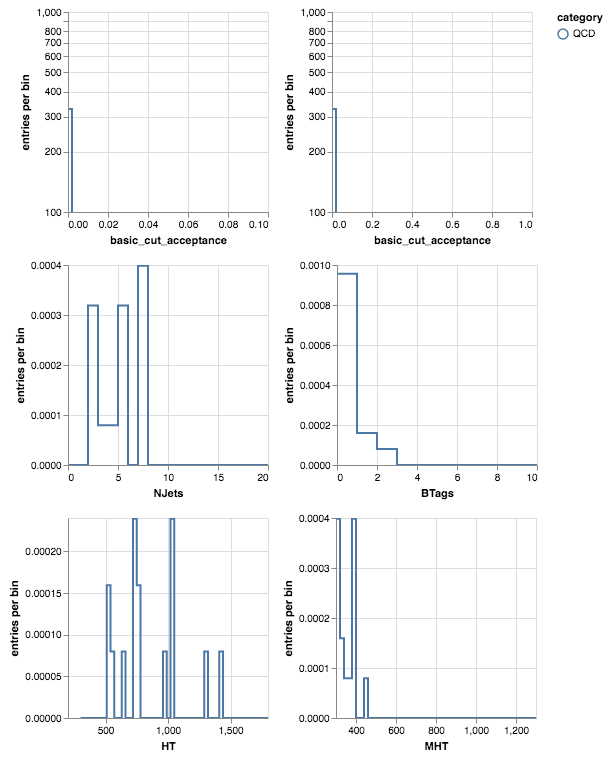

Summer16.QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8         2.369 M events,   3.019 M events/sec


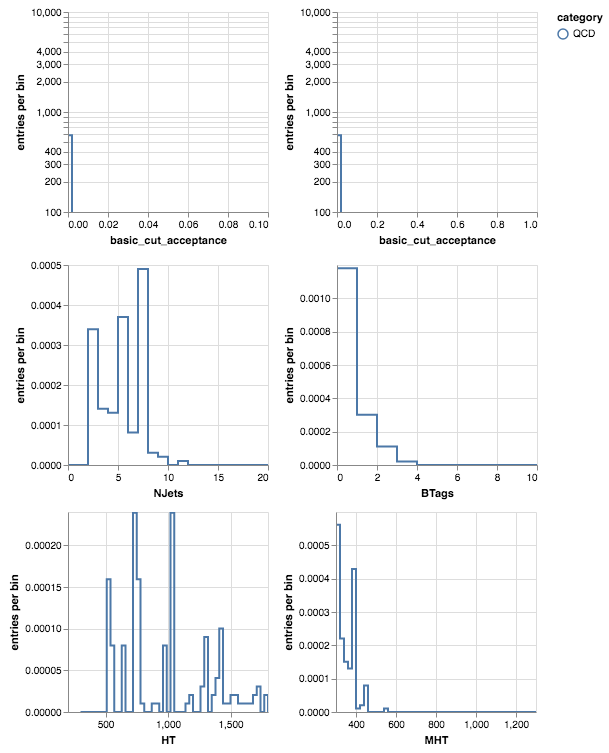

Summer16.QCD_HT2000toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8          1.221 M events,   2.093 M events/sec


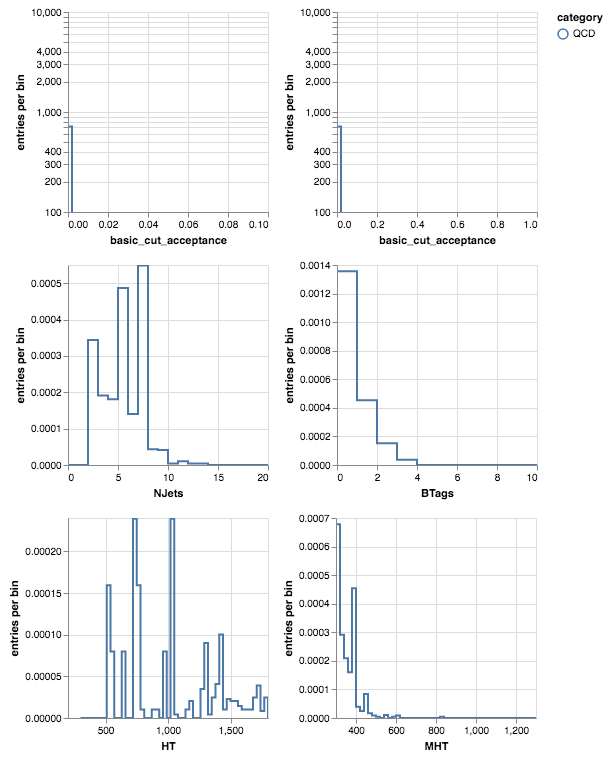

Summer16.QCD_HT200to300_TuneCUETP8M1_13TeV-madgraphMLM-pythia8          11.524 M events,   6.119 M events/sec


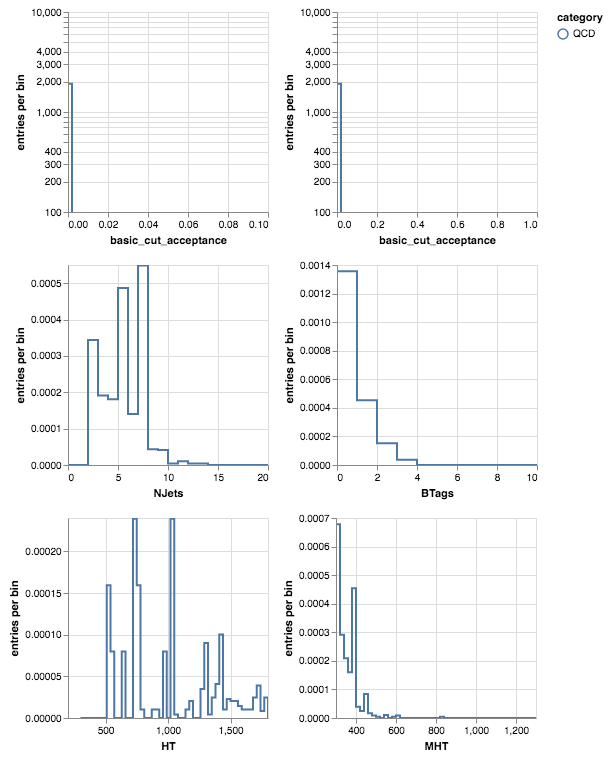

Summer16.QCD_HT300to500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8          10.895 M events,   7.352 M events/sec


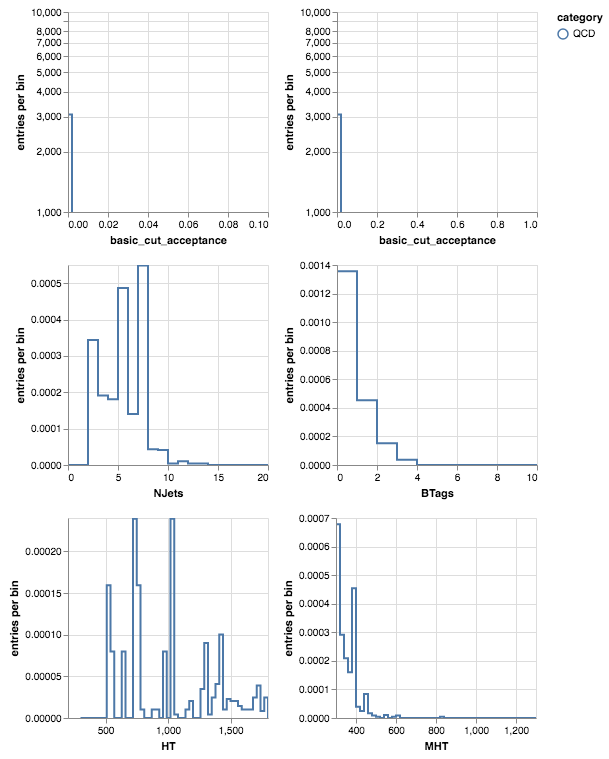

Striped worker #179 excepton:
Traceback (most recent call last):
  File "product/worker/socket_worker_spawner3.py", line 79, in run
    self.runWorker(params, dxsock, addr)
  File "product/worker/socket_worker_spawner3.py", line 121, in runWorker
    nevents = worker.run()
  File "/home/ivm/build/striped/worker/StripedWorker2.py", line 149, in run
    for frame in dataset.frames(self.RGIDs):
  File "/home/ivm/build/striped/worker/QData2.py", line 113, in frames
    f = Frame(rginfo, self.ColumnToBranch, data, self.TagConditions)
  File "/home/ivm/build/striped/worker/QData2.py", line 33, in __init__
    v.addStripe(aname, raw_stroll[cn])
  File "/home/ivm/build/striped/worker/Vault.py", line 98, in addStripe
    self, len(data), self.Length)
AssertionError: [Vault Length:0 SizeArray:(0) IndexShape:()]: incompatible stripe length in addStripe: 261804, expected 0



Summer16.QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8          12.416 M events,   0.204 M events/sec


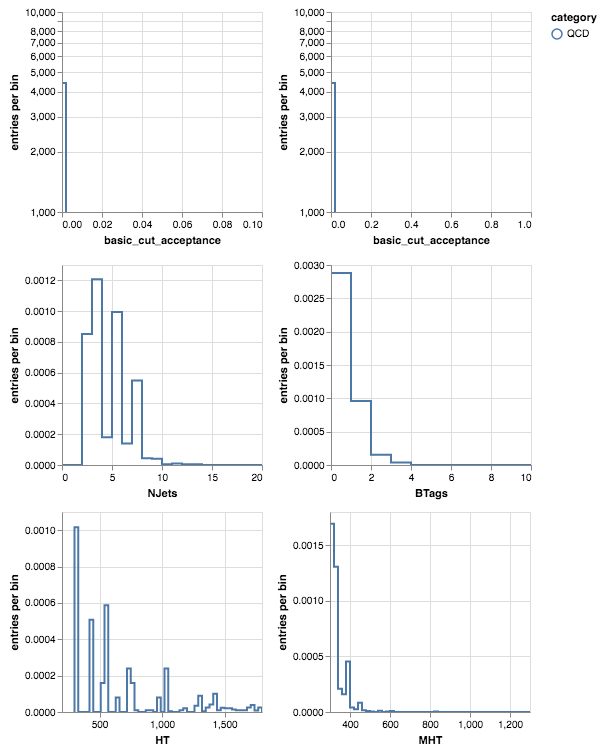

Summer16.QCD_HT700to1000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8          9.101 M events,   0.202 M events/sec


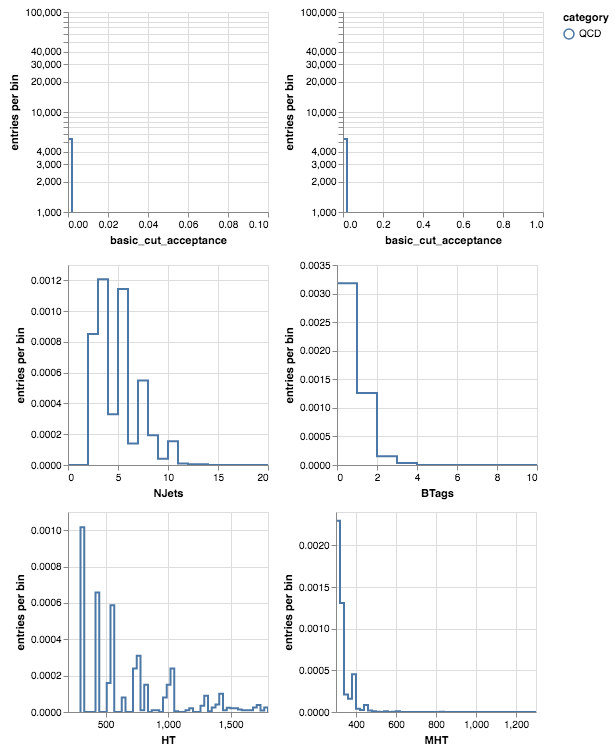

Summer16.ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8          0.600 M events,   0.161 M events/sec


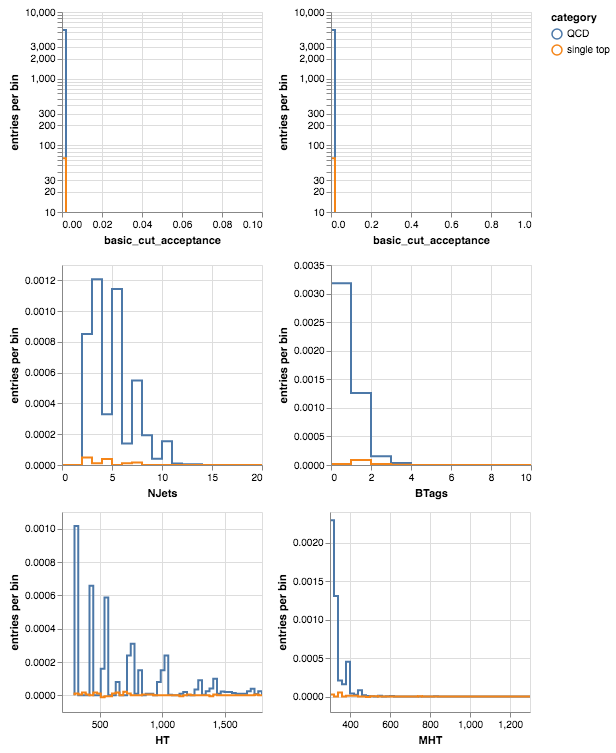

Summer16.ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-pythia8_TuneCUETP   0.188 M events,   0.084 M events/sec


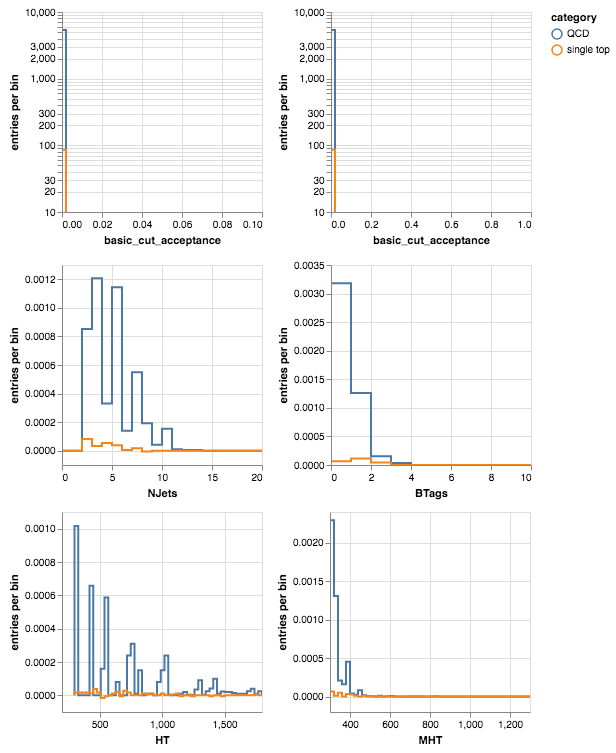

Summer16.ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powhegV2-madspi   7.757 M events,   0.214 M events/sec


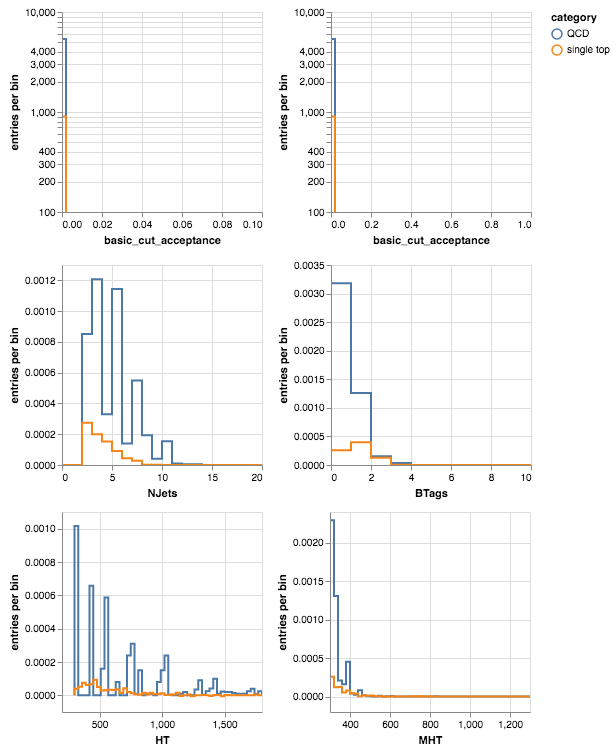

Summer16.ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-py  13.442 M events,   0.217 M events/sec


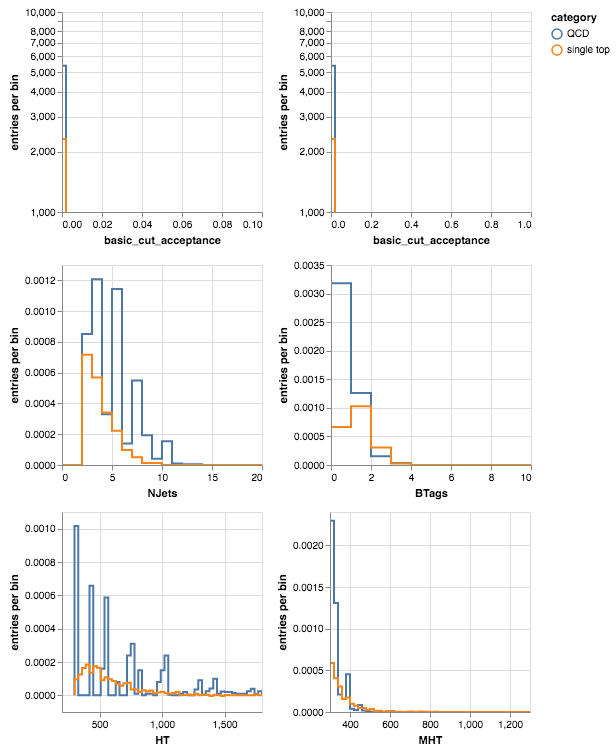

Summer16.ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUE   1.402 M events,   0.182 M events/sec


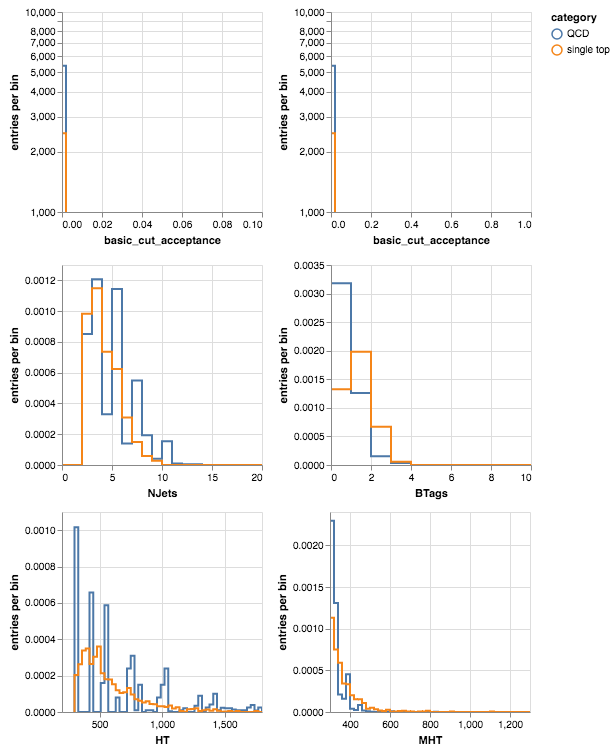

Summer16.ST_tW_antitop_5f_NoFullyHadronicDecays_13TeV-powheg_TuneCUETP   2.290 M events,   0.198 M events/sec


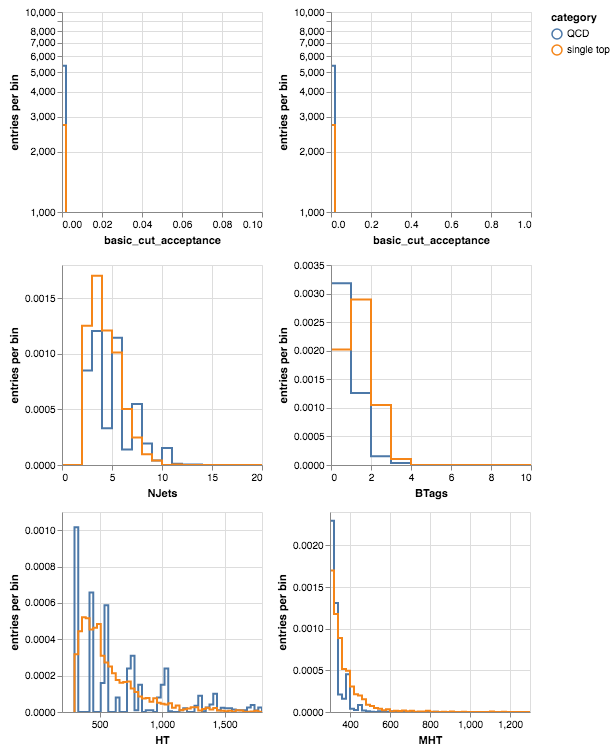

Summer16.ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M   1.385 M events,   0.184 M events/sec


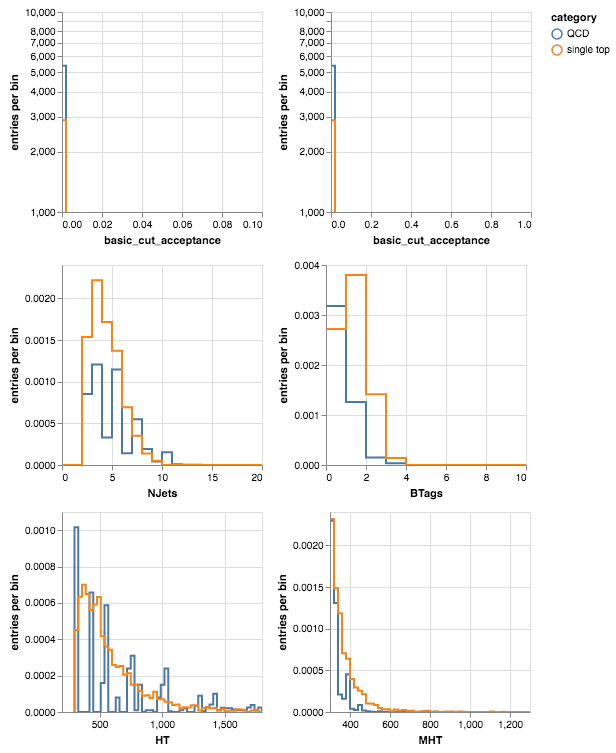

Summer16.ST_tW_top_5f_NoFullyHadronicDecays_13TeV-powheg_TuneCUETP8M1    2.272 M events,   0.194 M events/sec


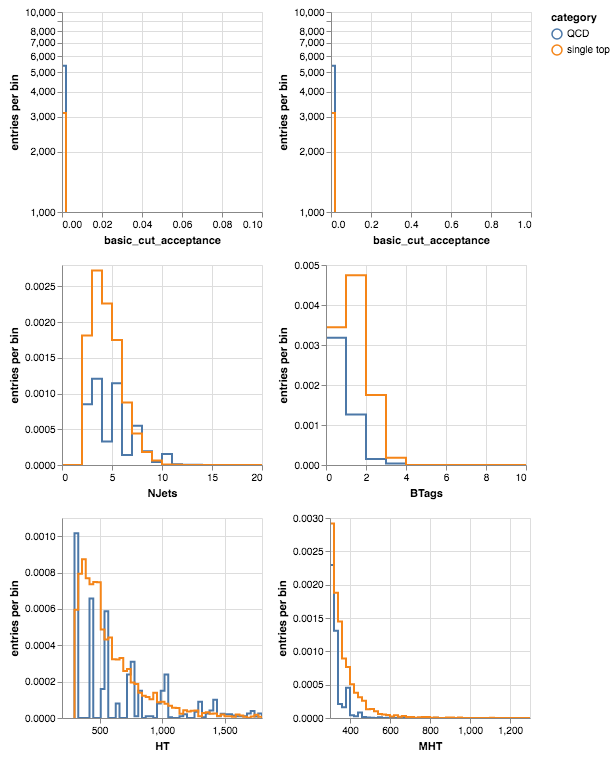

Summer16.WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8   5.880 M events,   0.125 M events/sec


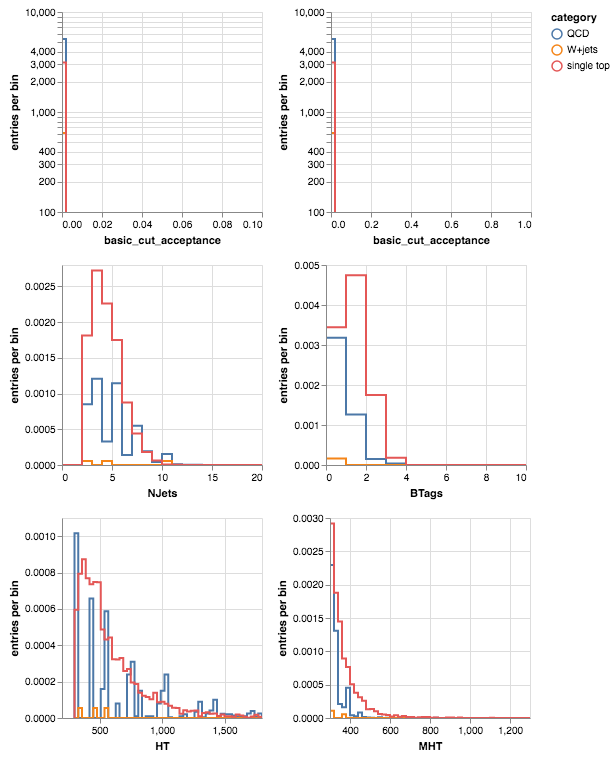

Summer16.WJetsToLNu_HT-1200To2500_TuneCUETP8M1_13TeV-madgraphMLM-pythi   1.367 M events,   0.171 M events/sec


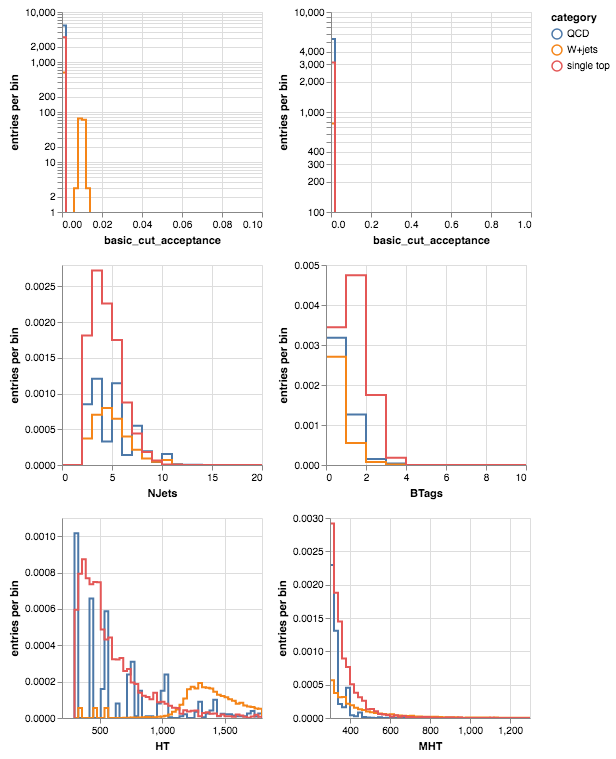

Summer16.WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8   3.960 M events,   0.211 M events/sec


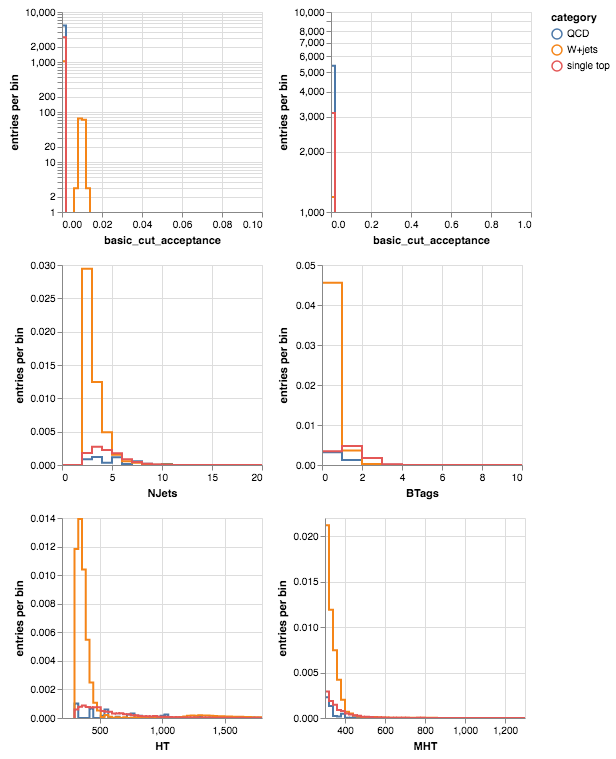

Summer16.WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia   0.530 M events,   0.134 M events/sec


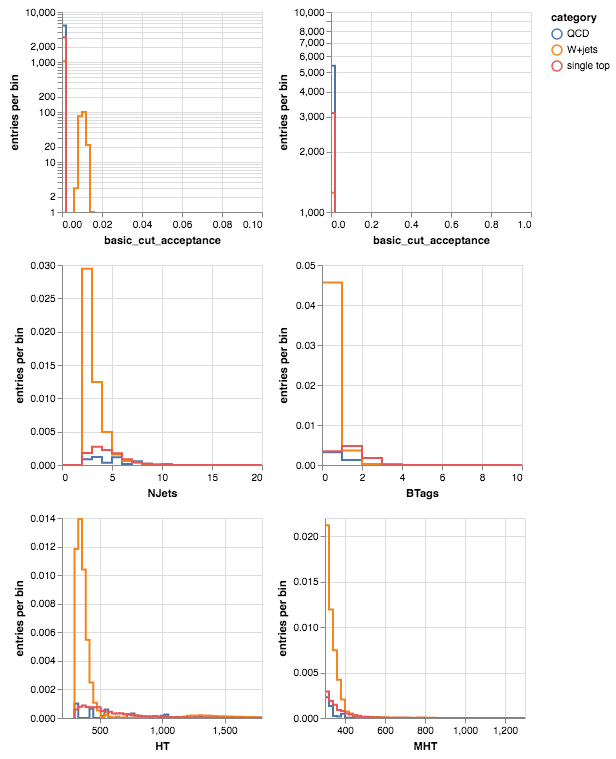

Summer16.WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8   1.569 M events,   0.185 M events/sec


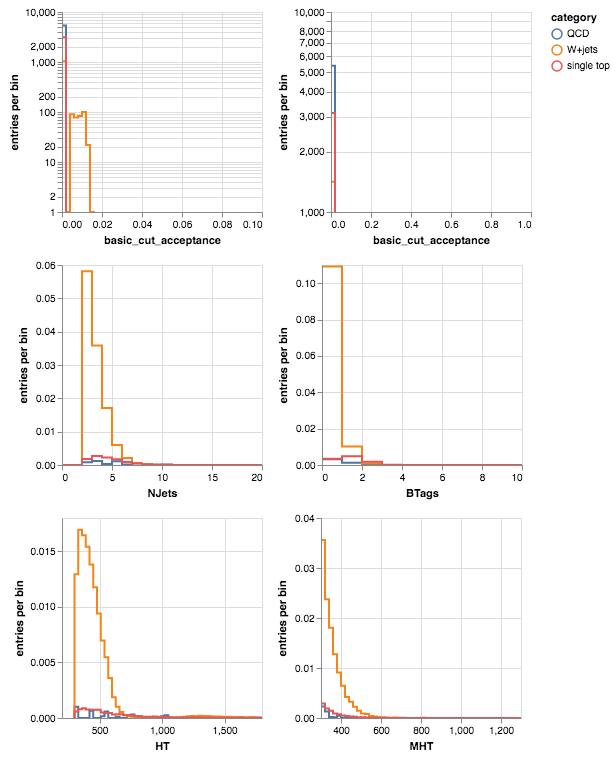

Summer16.WJetsToLNu_HT-600To800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8   3.735 M events,   0.194 M events/sec


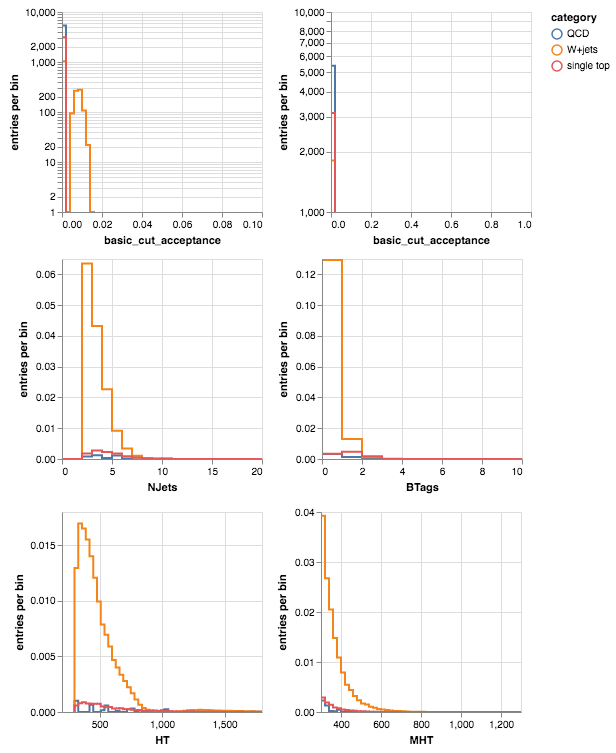

Summer16.WJetsToLNu_HT-800To1200_TuneCUETP8M1_13TeV-madgraphMLM-pythia   1.548 M events,   0.181 M events/sec


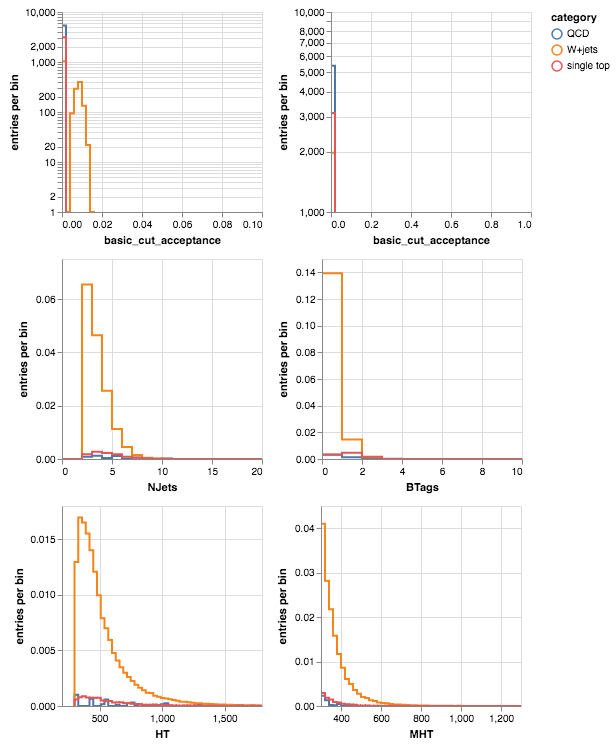

Summer16.WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8              17.402 M events,   0.262 M events/sec


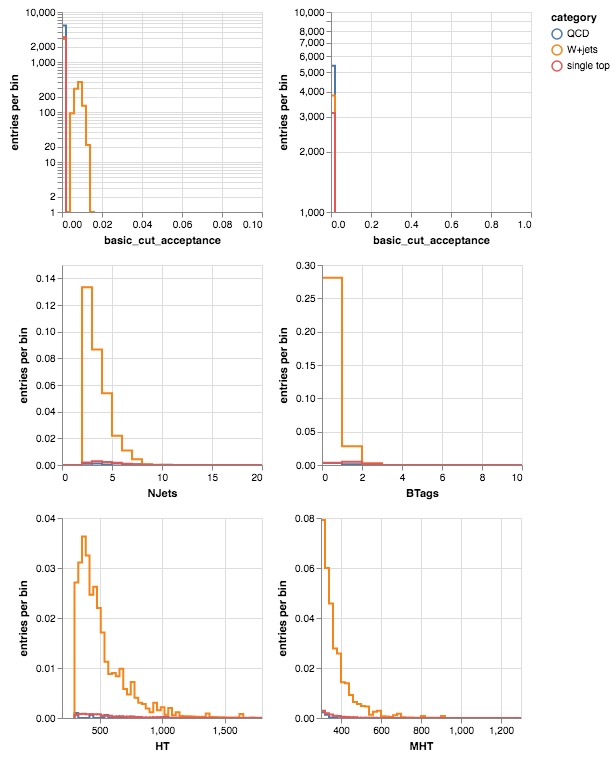

Summer16.ZJetsToNuNu_HT-100To200_13TeV-madgraph                          4.867 M events,   0.234 M events/sec


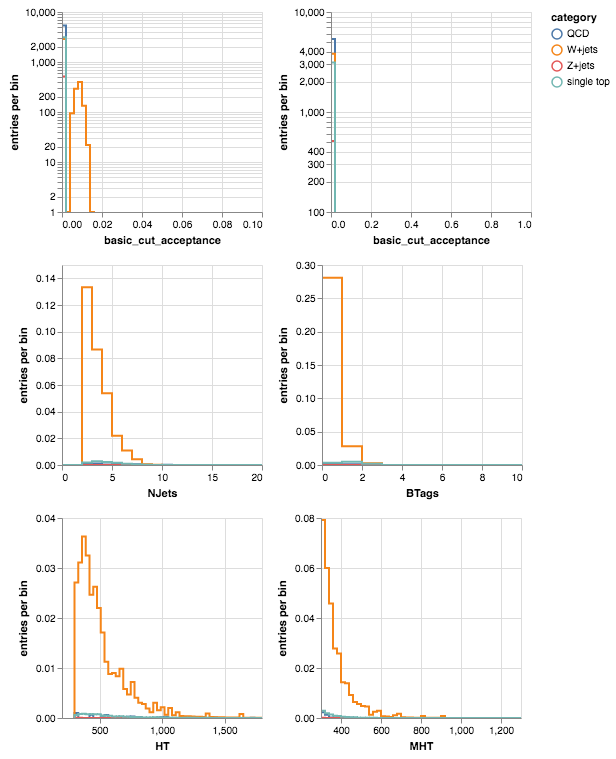

Summer16.ZJetsToNuNu_HT-1200To2500_13TeV-madgraph                        0.105 M events,   0.070 M events/sec


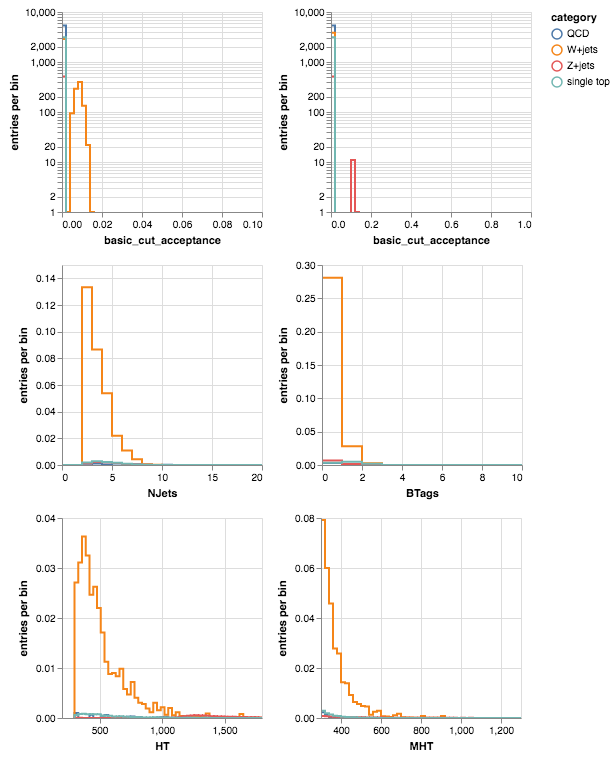

Summer16.ZJetsToNuNu_HT-200To400_13TeV-madgraph                          4.966 M events,   0.220 M events/sec


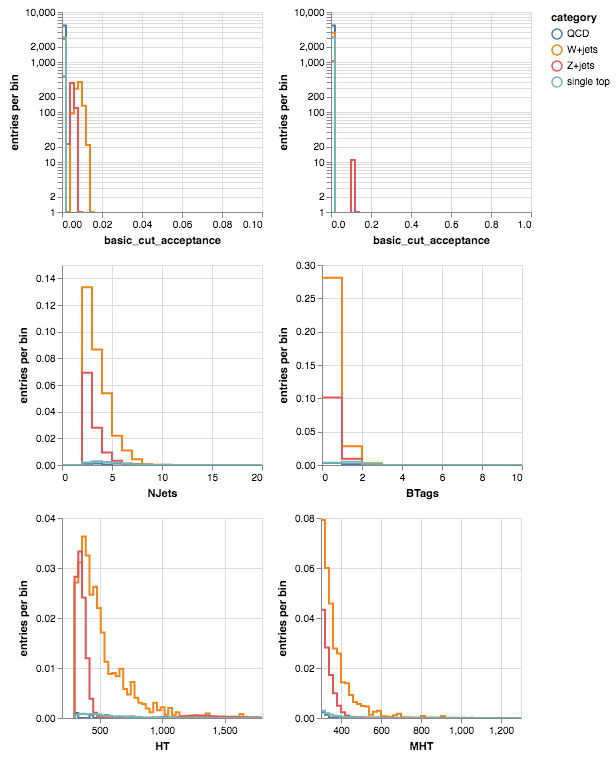

Summer16.ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph                         0.089 M events,   0.061 M events/sec


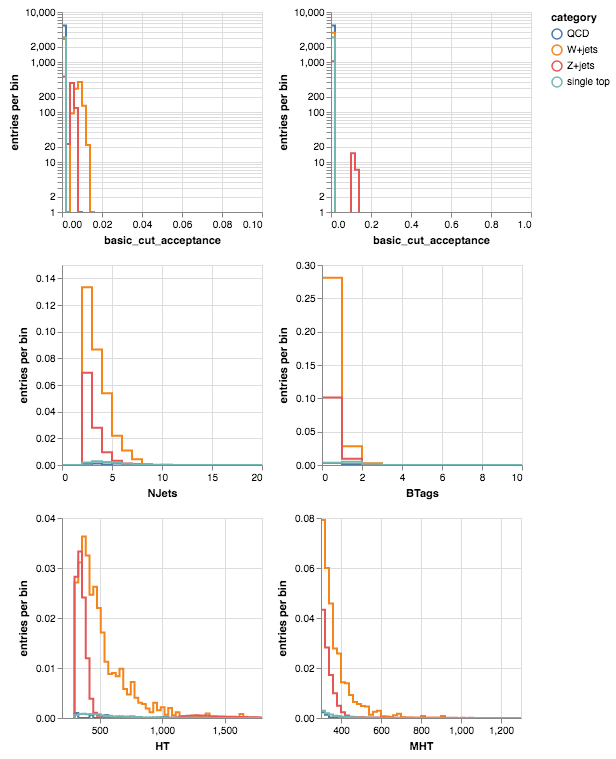

Summer16.ZJetsToNuNu_HT-400To600_13TeV-madgraph                          1.969 M events,   0.189 M events/sec


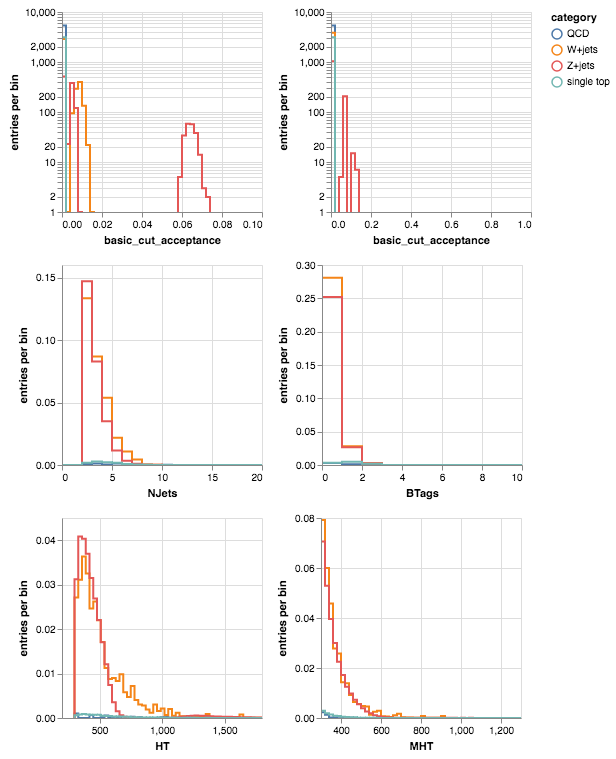

Summer16.ZJetsToNuNu_HT-600To800_13TeV-madgraph                          1.143 M events,   0.176 M events/sec


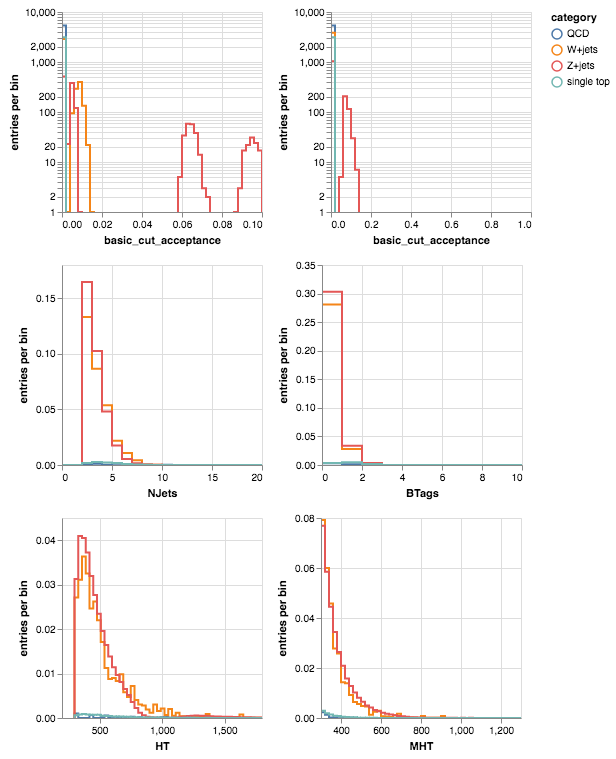

Summer16.ZJetsToNuNu_HT-800To1200_13TeV-madgraph                         0.431 M events,   0.128 M events/sec


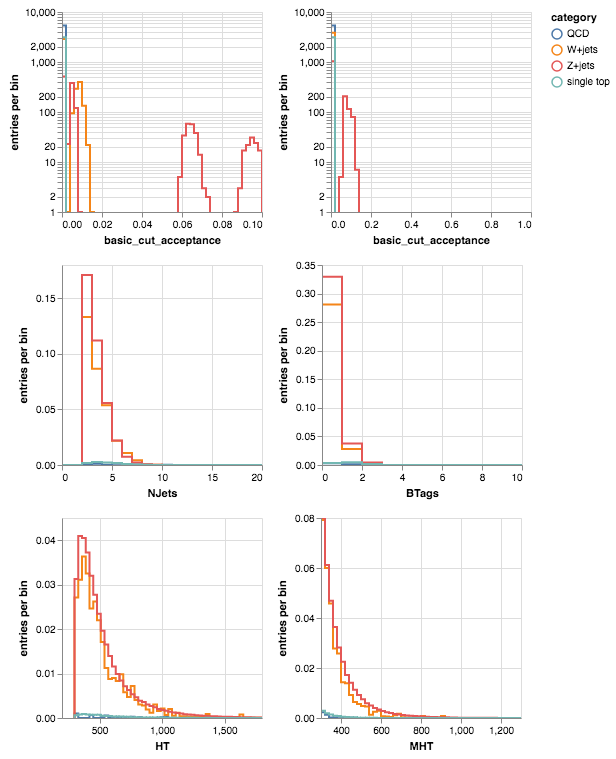

Summer16.ZJetsToNuNu_Zpt-100to200_TuneCUETP8M1_13TeV-madgraphMLM-pythi   2.056 M events,   0.219 M events/sec


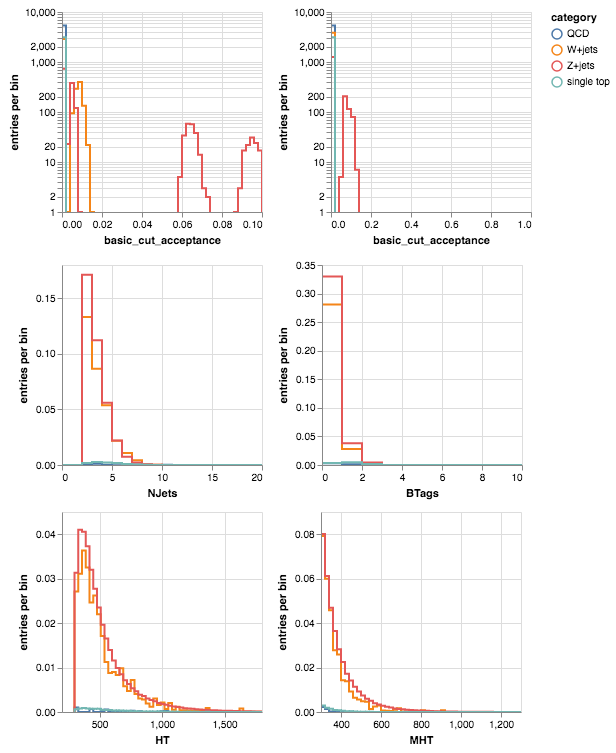

Summer16.ZJetsToNuNu_Zpt-200toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythi   0.797 M events,   0.169 M events/sec


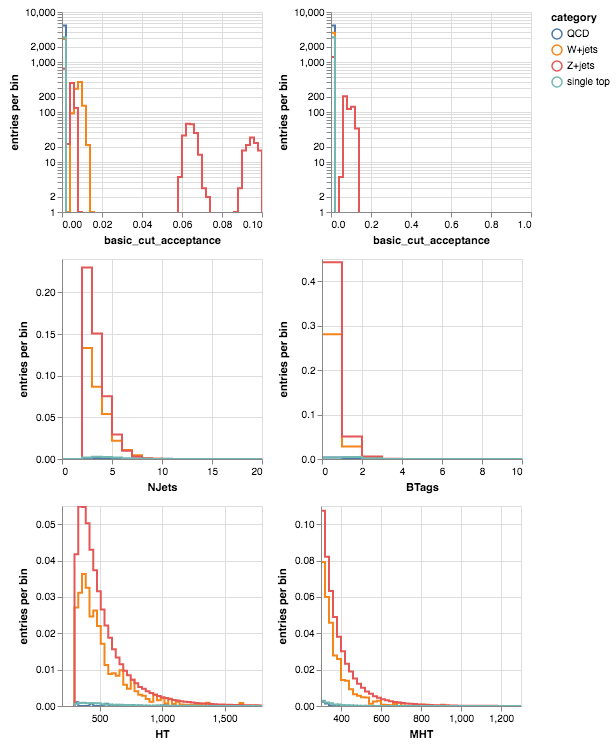

Summer16.TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8                   2.049 M events,   0.185 M events/sec


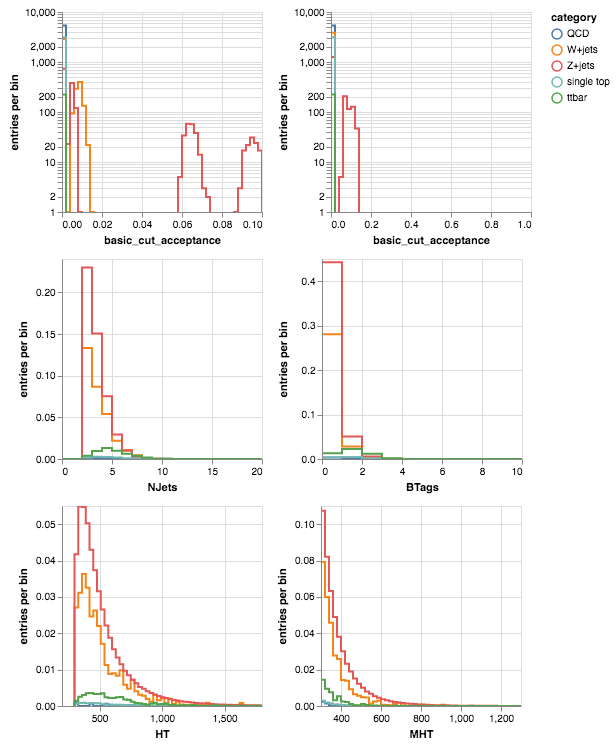

Summer16.SMS-T1tttt_mGluino-1500_mLSP-100_TuneCUETP8M1_13TeV-madgraphM   0.028 M events,   0.014 M events/sec


Total events processed: 134388933 in 530.8 seconds -> 0.253174 million events/second


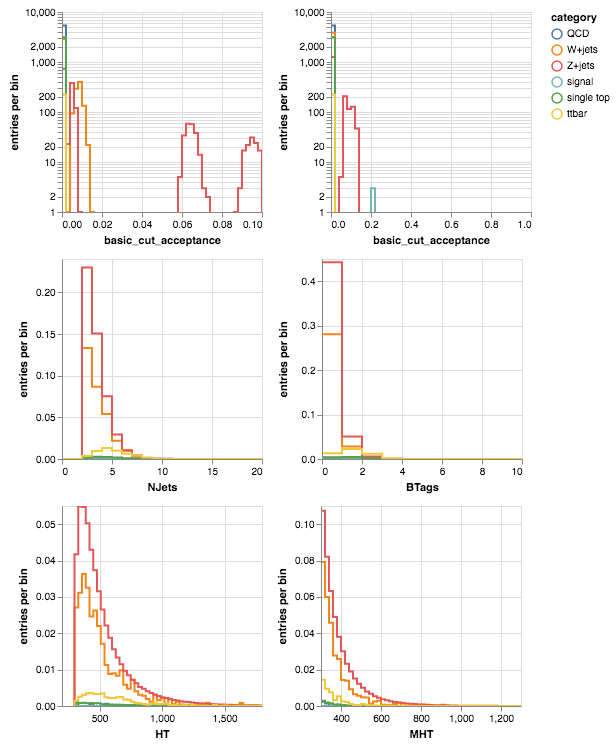

In [8]:
display.init()
callback = Callback(display)

import time
nevents_total = 0
t1 = time.time()
for dataset, category in datasets:
    job = session.createJob(dataset, 
            fraction= 0.2,                   # look at 20% events from each dataset
            user_callback=callback, 
            user_params = {"category":category},
            histograms = [basic_cut_narrow, basic_cut_wide, NJets, BTags, HT, MHT]
    )
    job.run()
    runtime = job.TFinish - job.TStart
    nevents = job.EventsProcessed
    nevents_total += nevents
    print "%-70s %7.3f M events, %7.3f M events/sec" % (dataset[:70], float(nevents)/1000000, nevents/runtime/1000000)
    #print "%s: %.6f million events/second" % (dataset, nevents/runtime/1000000)
    display.update()

t2 = time.time()
print "Total events processed: %d in %.1f seconds -> %.6f million events/second" %(nevents_total, t2-t1, nevents_total/(t2-t1)/1000000)
